In [136]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), Will be used for visualization as well

# Visualization libraries

import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/population-growth-of-top-25-countries/World Population.xlsx


In [137]:
!pip install dexplot
!pip install chart_studio

import chart_studio.plotly as py
import dexplot as dxp 

# **Data Preprocessing**

In [138]:
df_China = pd.read_excel(open('../input/population-growth-of-top-25-countries/World Population.xlsx','rb'),sheet_name='China')
df_India = pd.read_excel(open('../input/population-growth-of-top-25-countries/World Population.xlsx','rb'),sheet_name='India')
df_USA = pd.read_excel(open('../input/population-growth-of-top-25-countries/World Population.xlsx','rb'),sheet_name='USA')
df_Indonasia = pd.read_excel(open('../input/population-growth-of-top-25-countries/World Population.xlsx','rb'),sheet_name='Indonasia')
df_Pakistan = pd.read_excel(open('../input/population-growth-of-top-25-countries/World Population.xlsx','rb'),sheet_name='Pakistan')


In [139]:
df_China.head()

,Year,Population,Yearly %\nChange,Yearly\nChange,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban\nPop %,Urban Population,Country's Share of\nWorld Pop,World Population,\nGlobal Rank
0,2020,1439323776,0.39 %,5540090,-348399,38.4,1.69,153,60.8 %,875075919,18.47 %,7794798739,1
1,2019,1433783686,0.43 %,6135900,-348399,37.0,1.65,153,59.7 %,856409297,18.59 %,7713468100,1
2,2018,1427647786,0.47 %,6625995,-348399,37.0,1.65,152,58.6 %,837022095,18.71 %,7631091040,1
3,2017,1421021791,0.49 %,6972440,-348399,37.0,1.65,151,57.5 %,816957613,18.83 %,7547858925,1
4,2016,1414049351,0.51 %,7201481,-348399,37.0,1.65,151,56.3 %,796289491,18.94 %,7464022049,1


**Cleaning Data!**

In [140]:


df_China.columns = df_China.columns.str.replace(' ', '_')
df_China=df_China.rename(columns={'Yearly_%\nChange':'Yearly_%_Change','Yearly\nChange':'Yearly_Change',
                        "Country's_Share_of\nWorld_Pop":"Country's_Share_of_World_Pop",
                        'Urban\nPop_%':'Urban_Pop_%','\nGlobal_Rank':'Global_Rank'})

df_India.columns = df_India.columns.str.replace(' ', '_')
df_India=df_India.rename(columns={'Yearly_%\nChange':'Yearly_%_Change','Yearly\nChange':'Yearly_Change',
                        "Country's_Share_of\nWorld_Pop":"Country's_Share_of_World_Pop",
                        'Urban\nPop_%':'Urban_Pop_%','\nGlobal_Rank':'Global_Rank'})

df_USA.columns = df_USA.columns.str.replace(' ', '_')
df_USA=df_USA.rename(columns={'Yearly_%\nChange':'Yearly_%_Change','Yearly\nChange':'Yearly_Change',
                        "Country's_Share_of\nWorld_Pop":"Country's_Share_of_World_Pop",
                        'Urban\nPop_%':'Urban_Pop_%','\nGlobal_Rank':'Global_Rank'})

df_Indonasia.columns = df_Indonasia.columns.str.replace(' ', '_')
df_Indonasia=df_Indonasia.rename(columns={'Yearly_%\nChange':'Yearly_%_Change','Yearly\nChange':'Yearly_Change',
                        "Country's_Share_of\nWorld_Pop":"Country's_Share_of_World_Pop",
                        'Urban\nPop_%':'Urban_Pop_%','\nGlobal_Rank':'Global_Rank'})

df_Pakistan.columns = df_Pakistan.columns.str.replace(' ', '_')
df_Pakistan=df_Pakistan.rename(columns={'Yearly_%\nChange':'Yearly_%_Change','Yearly\nChange':'Yearly_Change',
                        "Country's_Share_of\nWorld_Pop":"Country's_Share_of_World_Pop",
                        'Urban\nPop_%':'Urban_Pop_%','\nGlobal_Rank':'Global_Rank'})


In [141]:
df_China.head()

,Year,Population,Yearly_%_Change,Yearly_Change,Migrants_(net),Median_Age,Fertility_Rate,Density_(P/Km²),Urban_Pop_%,Urban_Population,Country's_Share_of_World_Pop,World_Population,Global_Rank
0,2020,1439323776,0.39 %,5540090,-348399,38.4,1.69,153,60.8 %,875075919,18.47 %,7794798739,1
1,2019,1433783686,0.43 %,6135900,-348399,37.0,1.65,153,59.7 %,856409297,18.59 %,7713468100,1
2,2018,1427647786,0.47 %,6625995,-348399,37.0,1.65,152,58.6 %,837022095,18.71 %,7631091040,1
3,2017,1421021791,0.49 %,6972440,-348399,37.0,1.65,151,57.5 %,816957613,18.83 %,7547858925,1
4,2016,1414049351,0.51 %,7201481,-348399,37.0,1.65,151,56.3 %,796289491,18.94 %,7464022049,1


**Concatinating all into one frame.**

In [142]:

frames = [df_China, df_India, df_USA, df_Indonasia, df_Pakistan]
df_concat= pd.concat(frames)

**Finding ,edians and adding into cleaned dataset which will help us in our visualization.**

In [143]:
df_concat['above1300m'] = ['above1300m'if i >=1300000000 else 'below1300m'for i in df_concat.Population]


In [144]:
arr = df_concat['Median_Age'].unique()
print("Median of Age: ",np.median(arr))



Median of Age:  24.9


In [145]:
df_concat['Median_of_Age'] = ['higher_24.9'if i >=24.9 else 'below_24.9'for i in df_concat['Median_Age']]

In [146]:
arr = df_concat['Urban_Population'].unique()
print("Median of Urban Population: ",np.median(arr))


Median of Urban Population:  145948933.5


In [147]:
df_concat['Median_of_Urban_Population'] = ['higher_145948933.5'if i >=145948933.5 else 'below_145948933.5'for i in df_concat['Urban_Population']]

# **EDA**

In [148]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 17
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          90 non-null     int64  
 1   Population                    90 non-null     int64  
 2   Yearly_%_Change               90 non-null     object 
 3   Yearly_Change                 90 non-null     int64  
 4   Migrants_(net)                90 non-null     int64  
 5   Median_Age                    90 non-null     float64
 6   Fertility_Rate                90 non-null     float64
 7   Density_(P/Km²)               90 non-null     int64  
 8   Urban_Pop_%                   90 non-null     object 
 9   Urban_Population              90 non-null     int64  
 10  Country's_Share_of_World_Pop  90 non-null     object 
 11  World_Population              90 non-null     int64  
 12  Global_Rank                   90 non-null     int64  
 13  above13

**No nulls found!**

In [149]:
df_concat.head()

,Year,Population,Yearly_%_Change,Yearly_Change,Migrants_(net),Median_Age,Fertility_Rate,Density_(P/Km²),Urban_Pop_%,Urban_Population,Country's_Share_of_World_Pop,World_Population,Global_Rank,above1300m,Median_of_Age,Median_of_Urban_Population
0,2020,1439323776,0.39 %,5540090,-348399,38.4,1.69,153,60.8 %,875075919,18.47 %,7794798739,1,above1300m,higher_24.9,higher_145948933.5
1,2019,1433783686,0.43 %,6135900,-348399,37.0,1.65,153,59.7 %,856409297,18.59 %,7713468100,1,above1300m,higher_24.9,higher_145948933.5
2,2018,1427647786,0.47 %,6625995,-348399,37.0,1.65,152,58.6 %,837022095,18.71 %,7631091040,1,above1300m,higher_24.9,higher_145948933.5
3,2017,1421021791,0.49 %,6972440,-348399,37.0,1.65,151,57.5 %,816957613,18.83 %,7547858925,1,above1300m,higher_24.9,higher_145948933.5
4,2016,1414049351,0.51 %,7201481,-348399,37.0,1.65,151,56.3 %,796289491,18.94 %,7464022049,1,above1300m,higher_24.9,higher_145948933.5


**Lets see the growth of top 5 most populated countries through matplotlib.pyplot.**

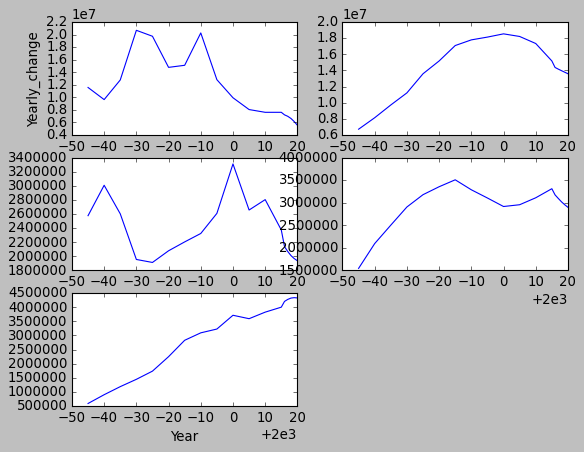

In [150]:
fig = plt.figure()
spec = gridspec.GridSpec(ncols=2, nrows=3,
                         width_ratios=[4,4])



ax0 = fig.add_subplot(spec[0])
ax0.set_ylabel('Yearly_change')
ax0.plot('Year','Yearly_Change', data = df_China)

ax1 = fig.add_subplot(spec[1])
ax1.plot('Year','Yearly_Change', data = df_India)

ax2 = fig.add_subplot(spec[2])
ax2.plot('Year','Yearly_Change', data = df_USA)

ax3 = fig.add_subplot(spec[3])
ax3.plot('Year','Yearly_Change', data = df_Indonasia)

ax4 = fig.add_subplot(spec[4])
ax4.set_xlabel('Year')
ax4.plot('Year','Yearly_Change', data = df_Pakistan)




plt.show()



**Lets visualize Medians through seaborn.**

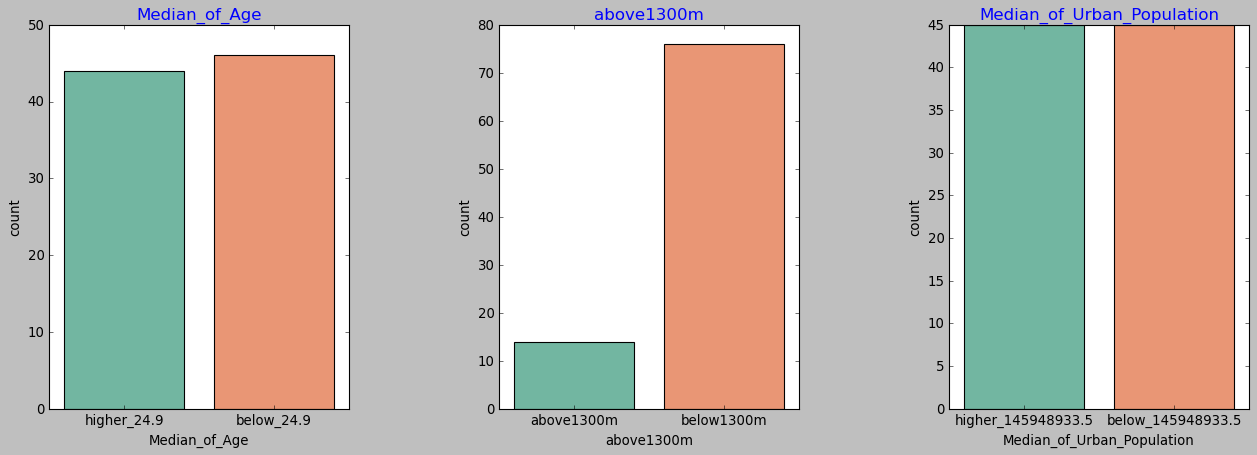

In [151]:
def drawAnyAmount(a,i):
    sns.countplot(x=df_concat[a],  palette="Set2",ax=axs[i])
    axs[i].set_title(a, color='blue', fontsize=15)
    

a=['Median_of_Age','above1300m', 'Median_of_Urban_Population']
iterr= 0

numToPlot = len(a)
fig, axs =plt.subplots(ncols=numToPlot)
plt.subplots_adjust(right=2, wspace = 0.5)
for i in a:
    drawAnyAmount(i,iterr)
    iterr +=1

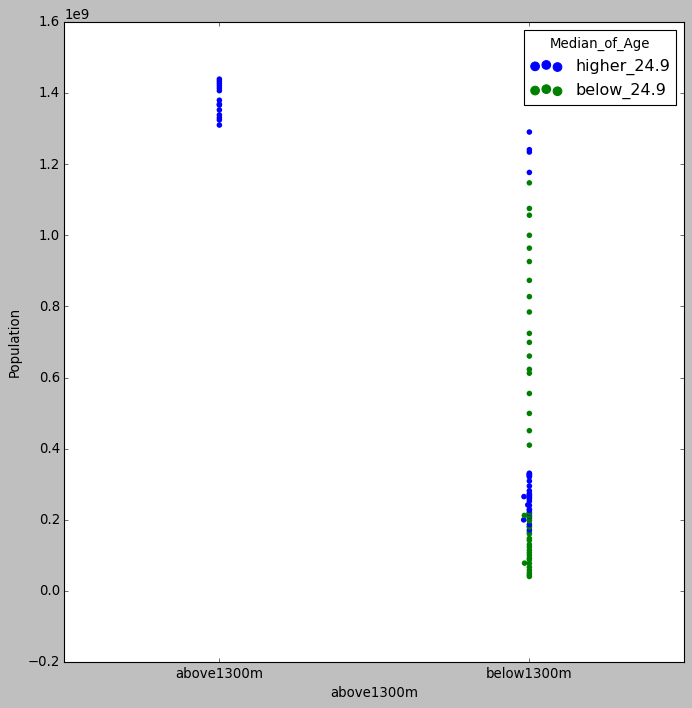

In [152]:
fig, ax = plt.subplots(figsize=(10,10))

sns.swarmplot(x='above1300m',y='Population',hue='Median_of_Age',data=df_concat, ax=ax)
plt.show()

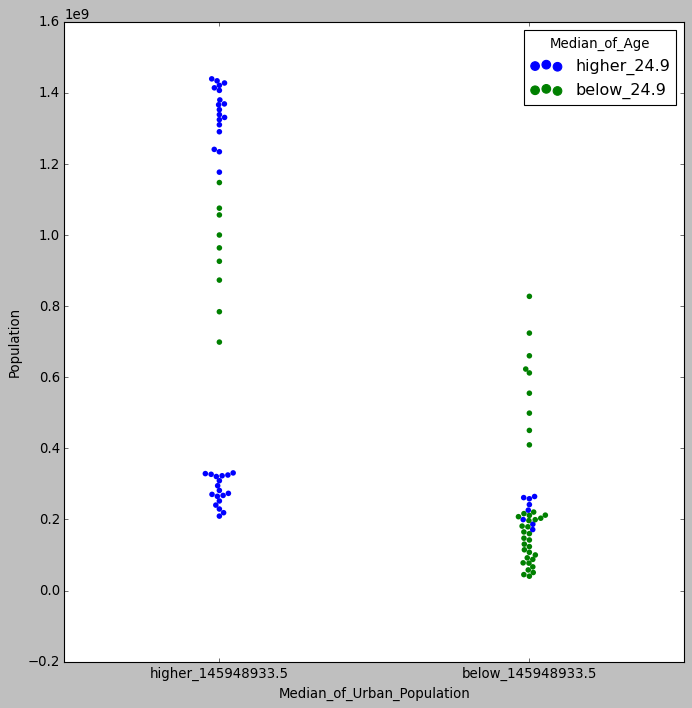

In [153]:
fig, ax = plt.subplots(figsize=(10,10))
sns.swarmplot(x='Median_of_Urban_Population',y='Population',hue='Median_of_Age',data=df_concat, ax=ax)
plt.show()

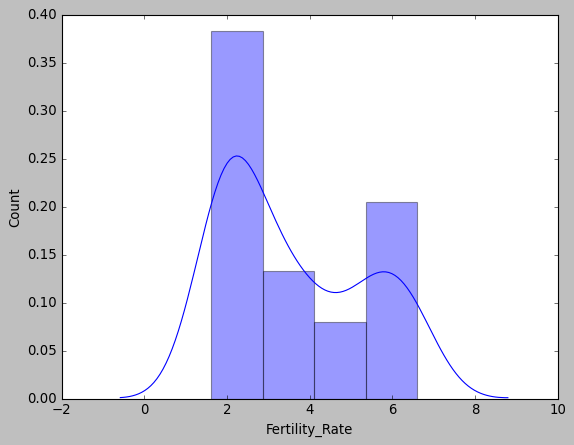

In [154]:
plt.style.use("classic")
sns.distplot(df_concat['Fertility_Rate'], color='blue')
plt.xlabel("Fertility_Rate")
plt.ylabel("Count")
plt.show()

**Using Pandas visualization functions, we'll see mean box plots of all 5 countries.**

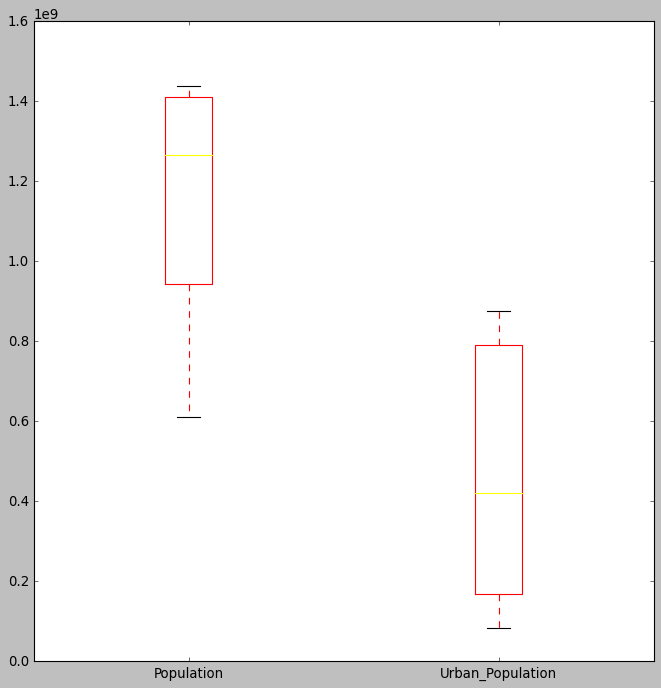

In [155]:
df_China[['Population', 'Urban_Population']].plot.box(figsize=(10,10), colormap =  'autumn')

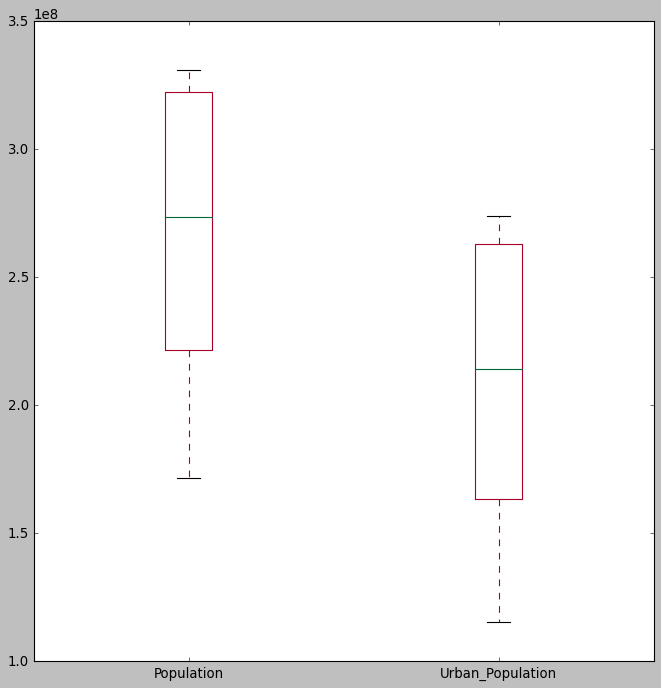

In [156]:
df_USA[['Population', 'Urban_Population']].plot.box(figsize=(10,10), colormap =  'RdYlGn')

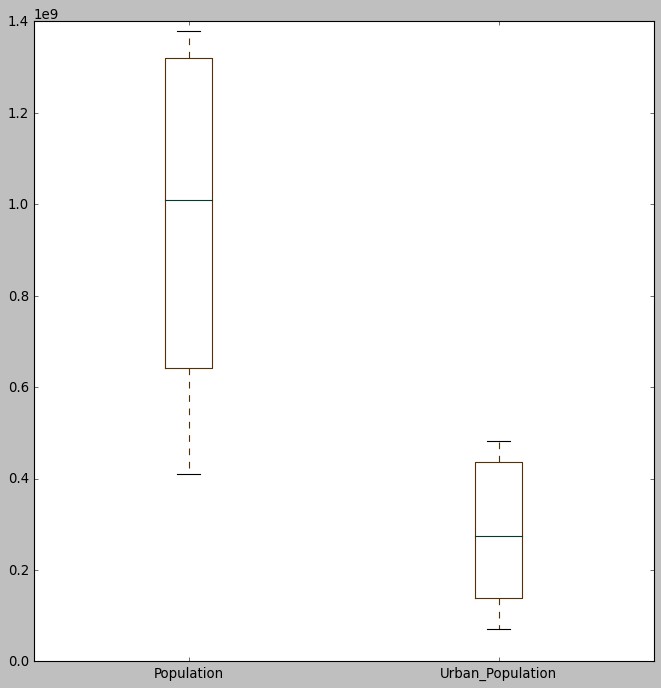

In [157]:
df_India[['Population', 'Urban_Population']].plot.box(figsize=(10,10), colormap =  'BrBG')

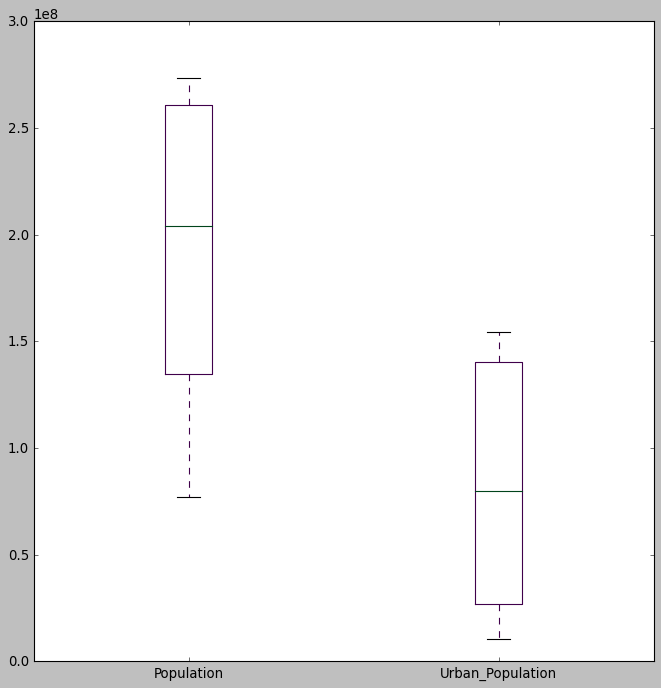

In [158]:
df_Indonasia[['Population', 'Urban_Population']].plot.box(figsize=(10,10), colormap =  'PRGn')

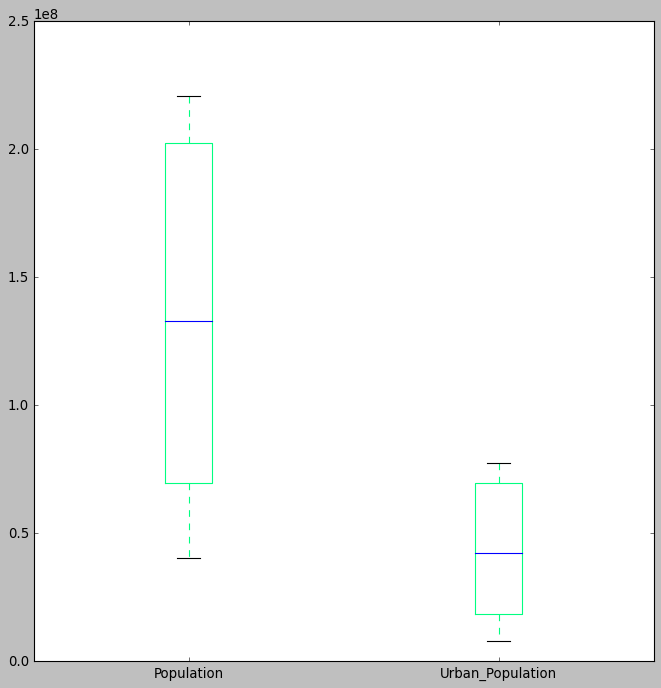

In [159]:
df_Pakistan[['Population', 'Urban_Population']].plot.box(figsize=(10,10), colormap =  'winter_r')

**Using Dexplot, we'll see relationship between a lot of our columns and we are focusing on USA!**

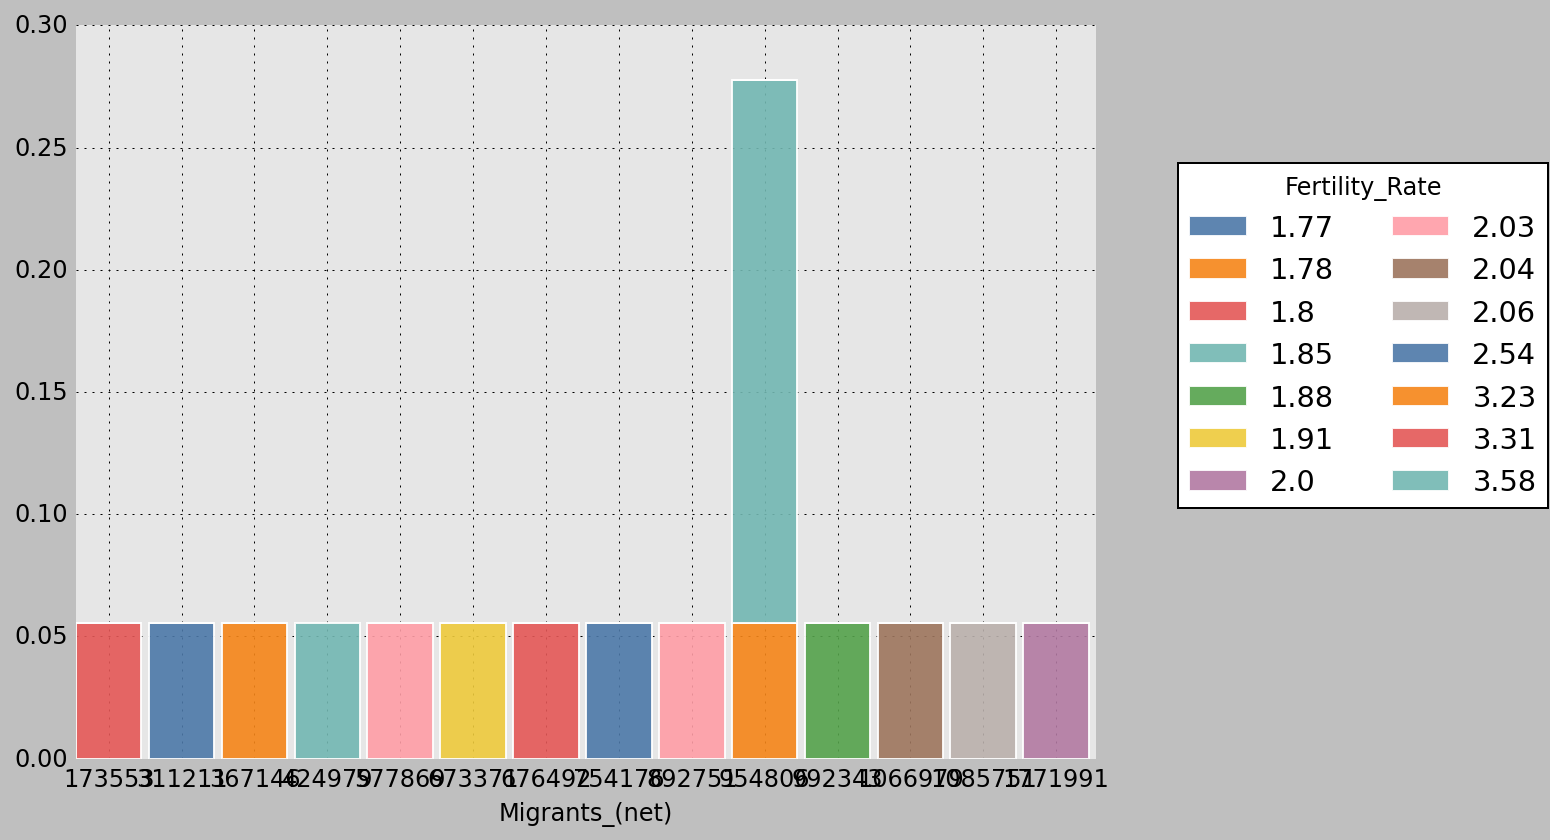

In [160]:
dxp.count('Migrants_(net)',df_USA, split='Fertility_Rate',normalize=True,figsize=(8,6),size=0.9,stacked=True)

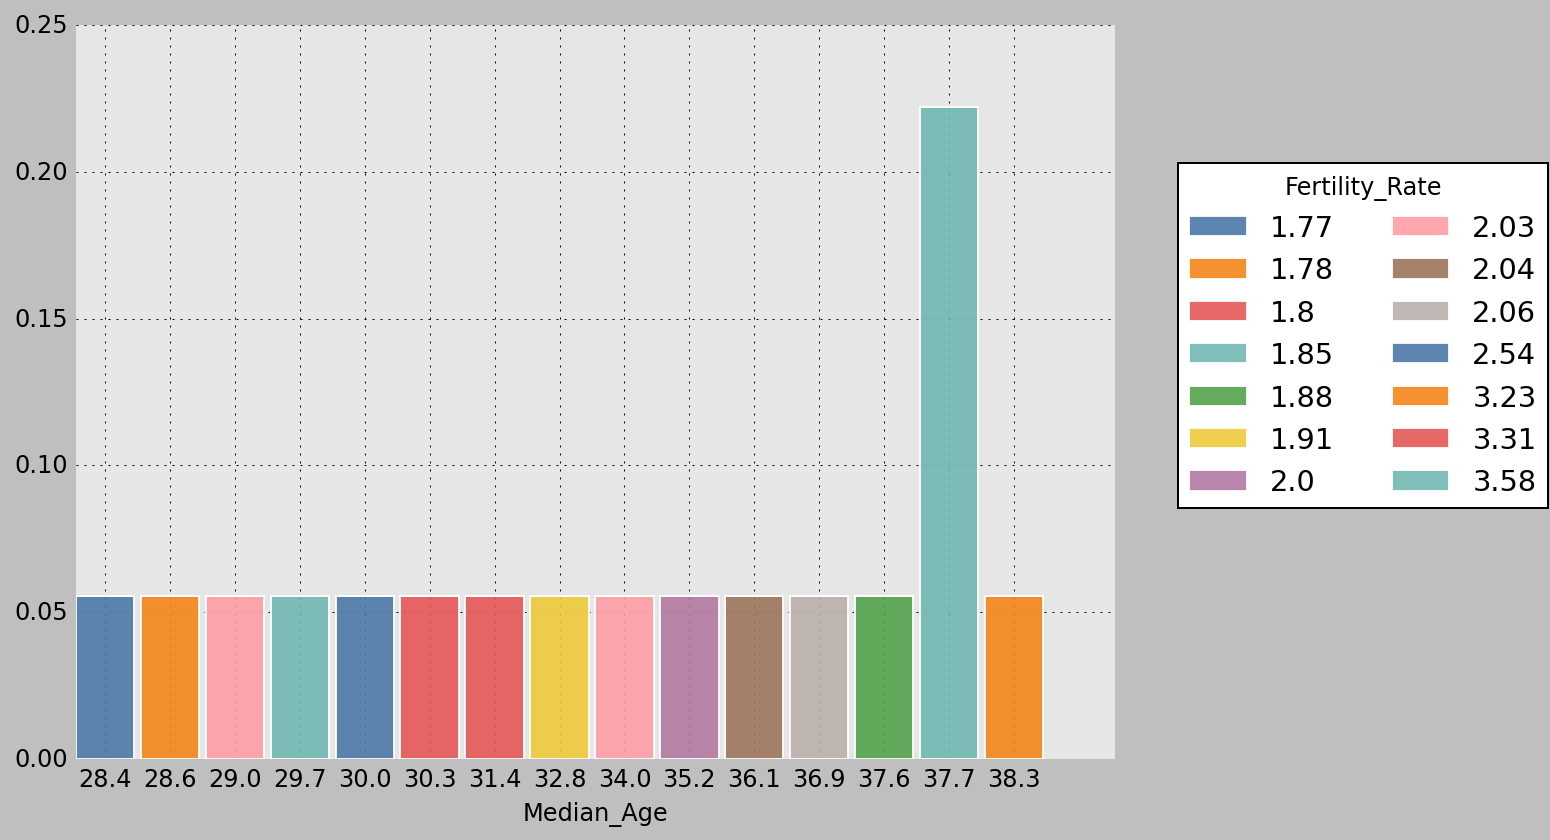

In [161]:
dxp.count('Median_Age',df_USA, split='Fertility_Rate',normalize=True,figsize=(8,6),size=0.9,stacked=True)

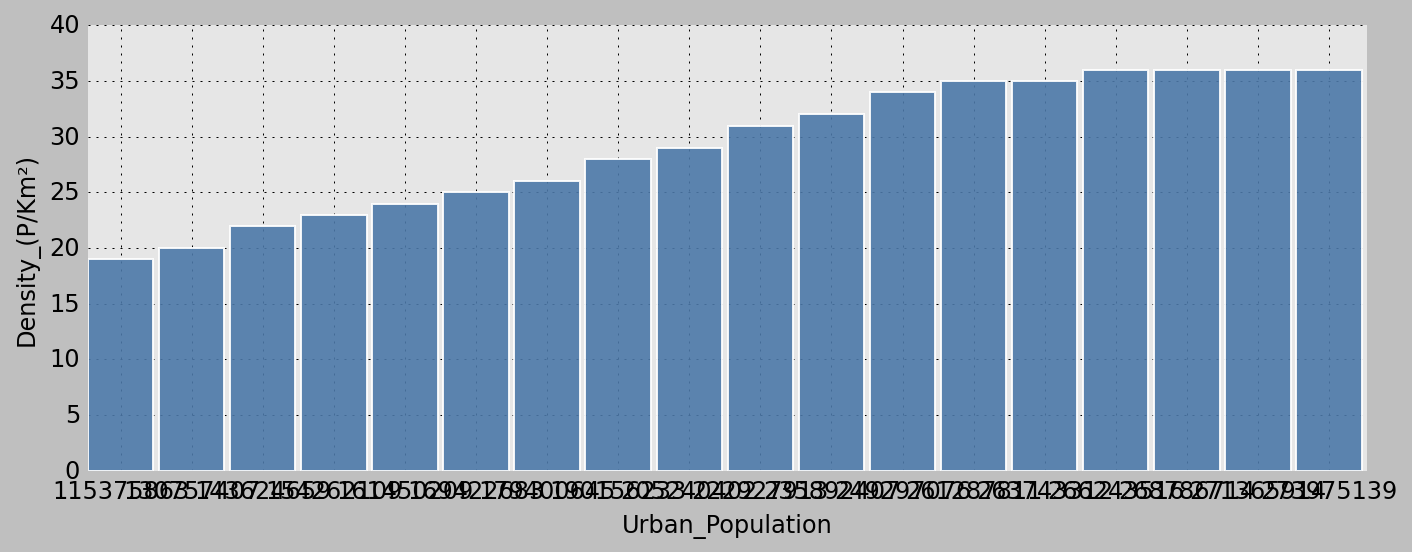

In [162]:
dxp.bar(x='Urban_Population', y='Density_(P/Km²)', data=df_USA, figsize=(10,4), aggfunc='median')

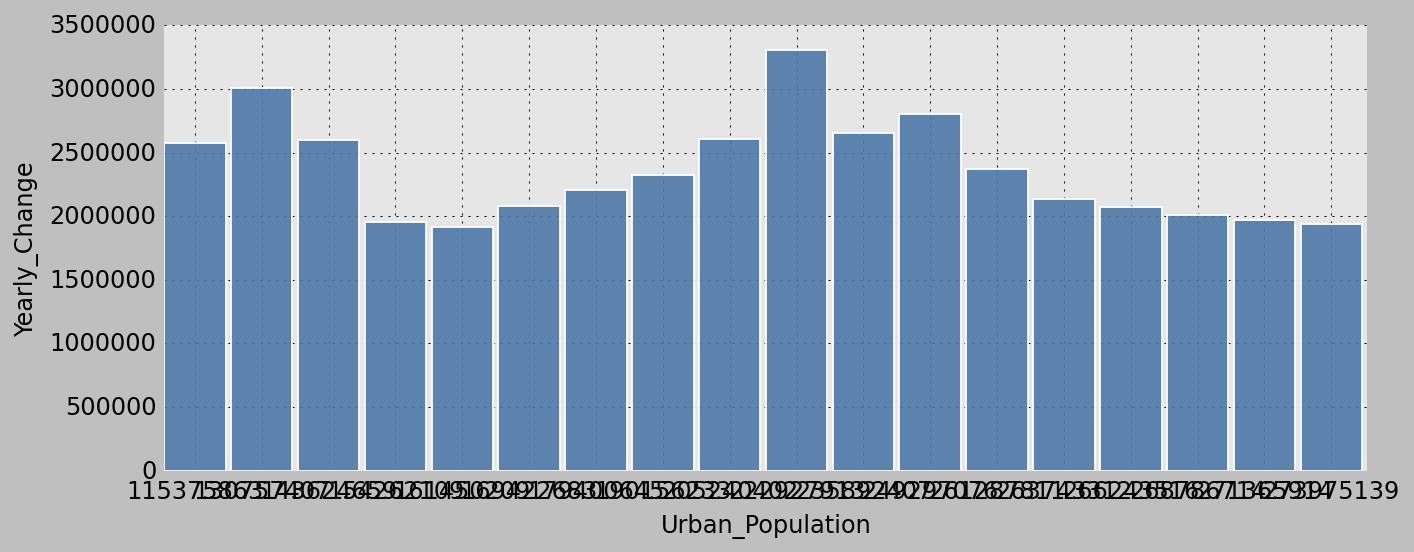

In [163]:
dxp.bar(x='Urban_Population', y='Yearly_Change', data=df_USA, figsize=(10,4),  aggfunc='median')

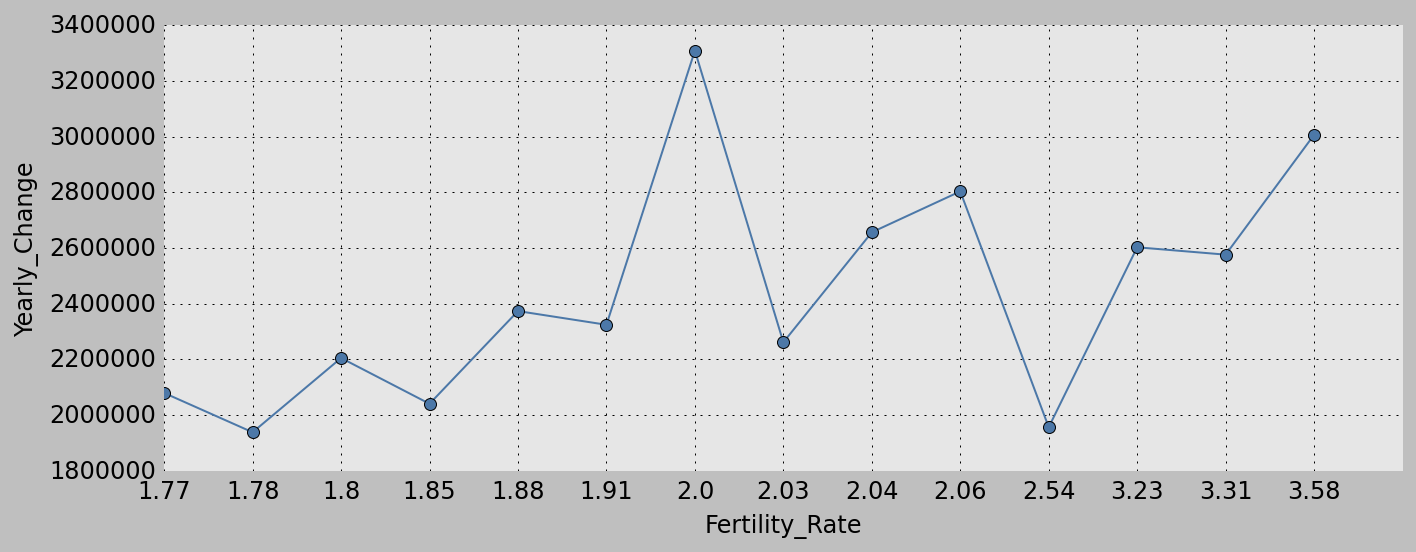

In [164]:
dxp.line(x='Fertility_Rate', y='Yearly_Change', data=df_USA, figsize = (10,4), aggfunc='median')

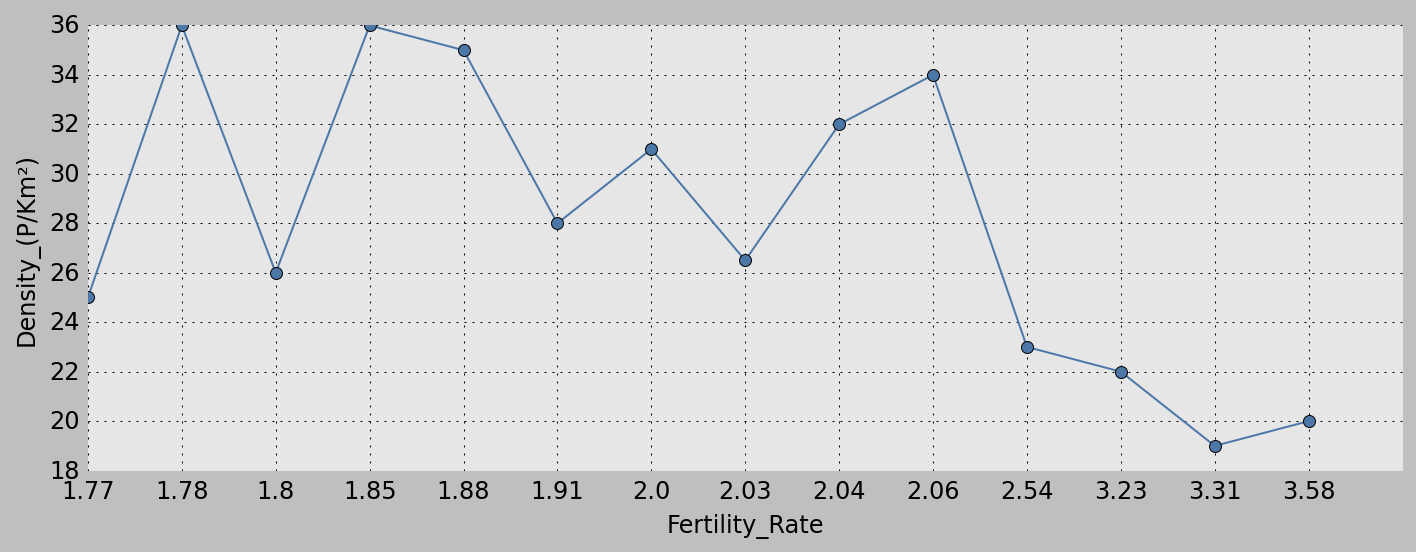

In [165]:
dxp.line(x='Fertility_Rate', y='Density_(P/Km²)', data=df_USA, figsize = (10,4), aggfunc='median')

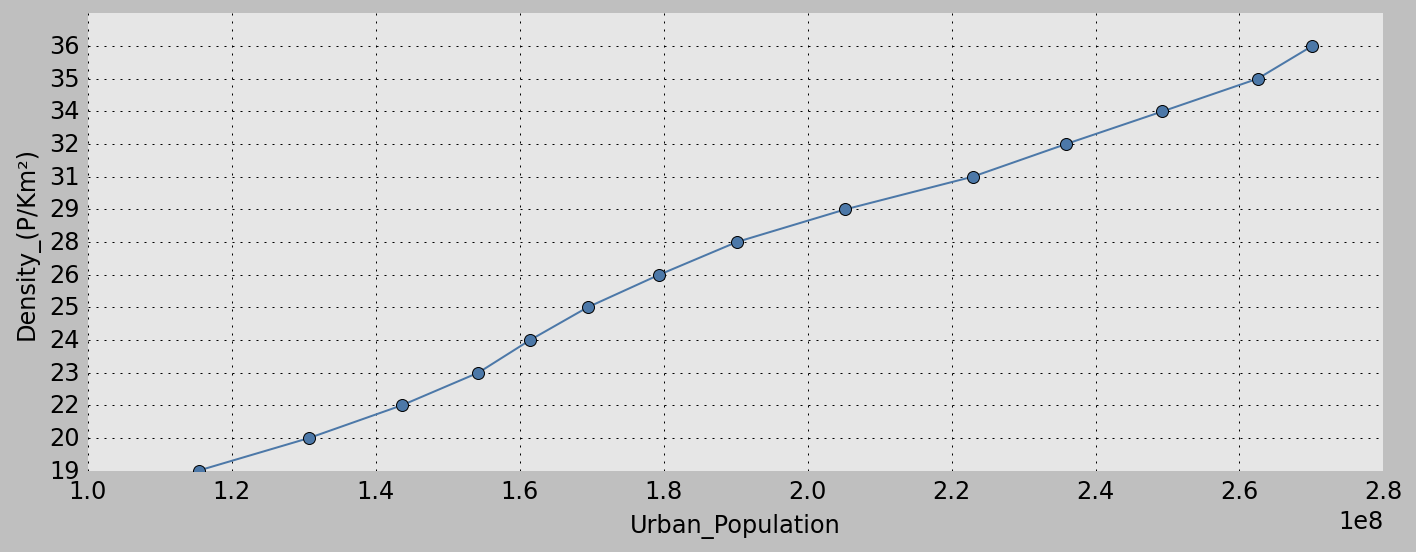

In [166]:
dxp.line(x='Urban_Population', y='Density_(P/Km²)', data=df_USA, figsize=(10,4), aggfunc='median', orientation='h')

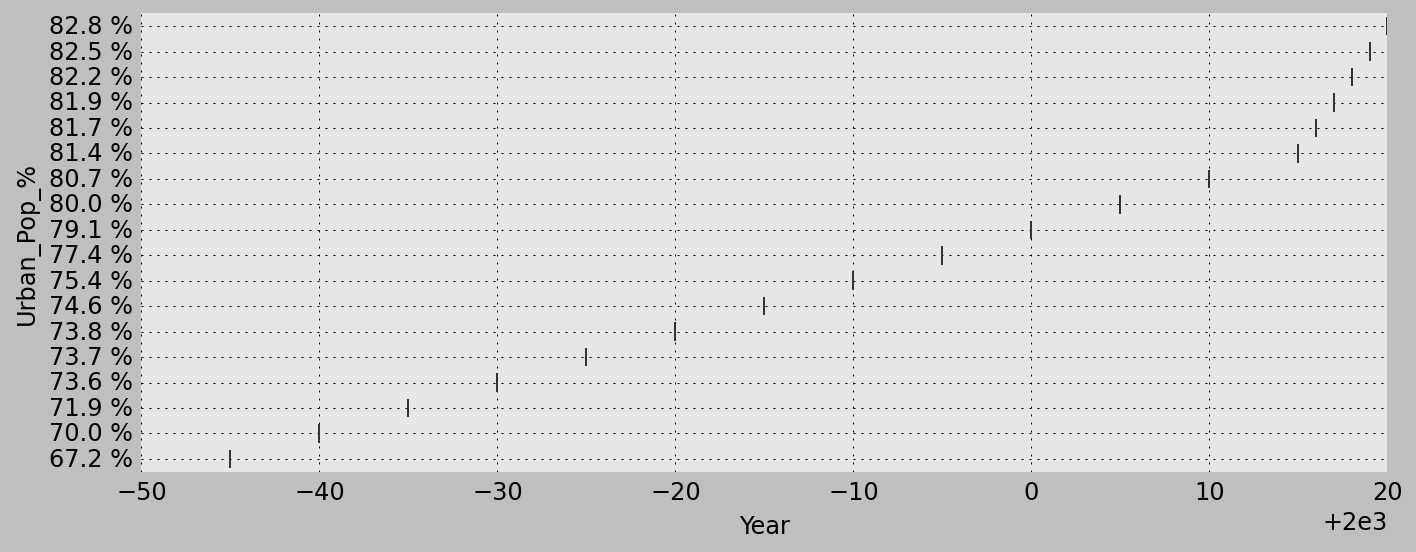

In [167]:
dxp.box(x='Year', y='Urban_Pop_%', data=df_USA,  figsize=(10,4))

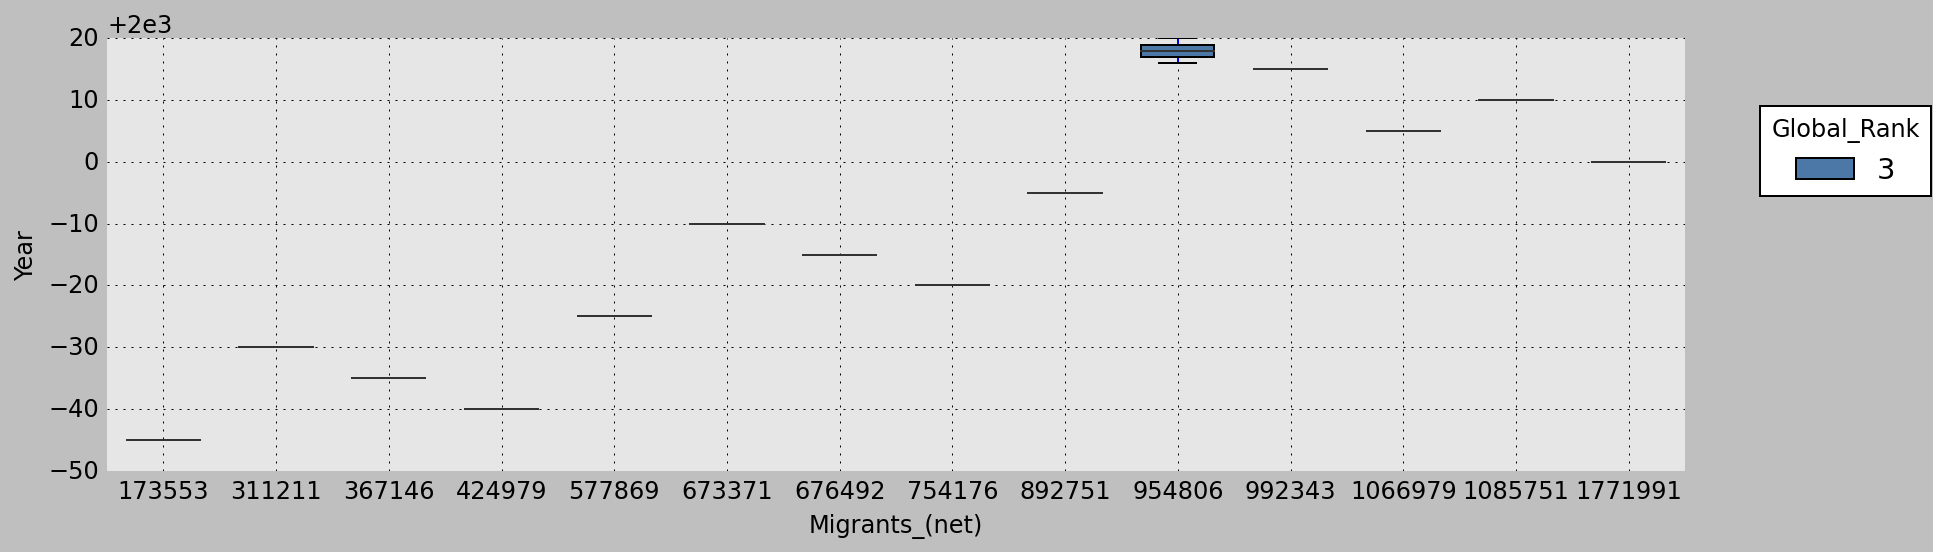

In [168]:
dxp.box(x='Migrants_(net)', y='Year', data=df_USA,orientation='v',figsize = (12,4),
        split='Global_Rank', split_order='top 2')

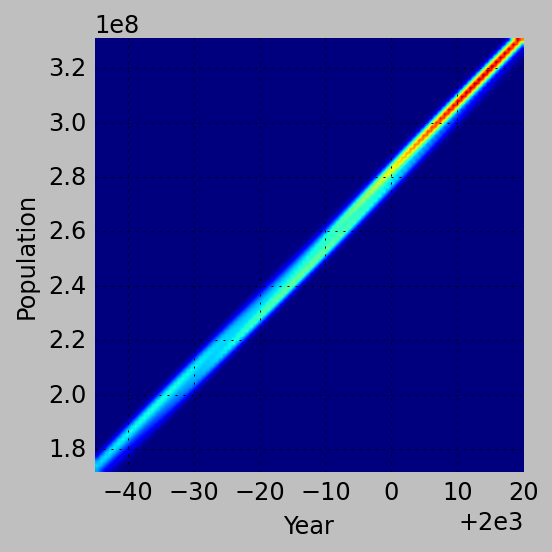

In [169]:
dxp.kde(x='Year', y='Population', data=df_USA, figsize=(4,4))